# Clase 25-03

Trabajamos con una imagen de distintas monedas que se encontraban acomodadas matricialmente

scikit-image es una librería de algoritmos para el procesamiento de imágenes  
Link https://scikit-image.org/

In [1]:
!pip install scikit-image watermark -q
!pip install opencv-python

## en caso de un error tuve que correr el siguiente bloque
# First, install necessary system libraries for OpenCV 
!apt-get update && apt-get install -y libgl1-mesa-glx -q
!apt-get install -y libglib2.0-0 -q


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 39.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Get:1 http://deb.debian.org/debian bullseye InRelease [116 kB]
Get:2 http://deb.debian.org/debian-security bullseye-security InRelease [27.2 kB]
Get:3 http://deb.debian.org/debian bullseye-updates InRelease [44.1 kB]
Get:4 http://deb.debian.org/debian bullseye/main amd64 Packages [8,066 kB]
Get:5 http://deb.debian.org/debian-security bullseye-security/main amd64 Packages [359 kB]
Get:6 http://deb.debian.org/debian bullseye-updates/main amd64 Packages [18.8 kB]
Fetched 8,631 kB in 1s (6,171 kB/s)

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouv

## Importar librerías

In [2]:
import numpy as np
import cv2 # OpenCV, short for Open Source Computer Vision Library
from cv2 import imread
import matplotlib.pyplot as plt

%load_ext watermark: Carga la extensión de IPython

%watermark: Muestra información básica del entorno actual, como la fecha y hora, el usuario y detalles del sistema operativo.

%watermark --iversions: Este comando lista las versiones de todas las bibliotecas que se están utilizando en tu entorno interactivo.

In [3]:
%load_ext watermark
%watermark
%watermark --iversions

Last updated: 2025-04-08T22:55:12.811436+00:00

Python implementation: CPython
Python version       : 3.10.15
IPython version      : 8.32.0

Compiler    : GCC 10.2.1 20210110
OS          : Linux
Release     : 6.1.128-136.201.amzn2023.x86_64
Machine     : x86_64
Processor   : 
CPU cores   : 4
Architecture: 64bit

matplotlib      : 3.6.3
deepnote_toolkit: 0.1.0
numpy           : 1.25.2
cv2             : 4.11.0



## Carga de imágenes

In [4]:
!wget https://d1lfxha3ugu3d4.cloudfront.net/images/opencollection/archives/size2/S03i3165l01.jpg

#https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.coins
#https://opencollection.brooklynmuseum.org/archives/image/51611

--2025-04-08 22:55:13--  https://d1lfxha3ugu3d4.cloudfront.net/images/opencollection/archives/size2/S03i3165l01.jpg
Resolving d1lfxha3ugu3d4.cloudfront.net (d1lfxha3ugu3d4.cloudfront.net)... 3.171.73.104, 3.171.73.228, 3.171.73.97, ...
Connecting to d1lfxha3ugu3d4.cloudfront.net (d1lfxha3ugu3d4.cloudfront.net)|3.171.73.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30340 (30K) [image/jpeg]
Saving to: ‘S03i3165l01.jpg.1’

S03i3165l01.jpg.1   100%[===================>]  29.63K  --.-KB/s    in 0.001s  

2025-04-08 22:55:14 (38.5 MB/s) - ‘S03i3165l01.jpg.1’ saved [30340/30340]



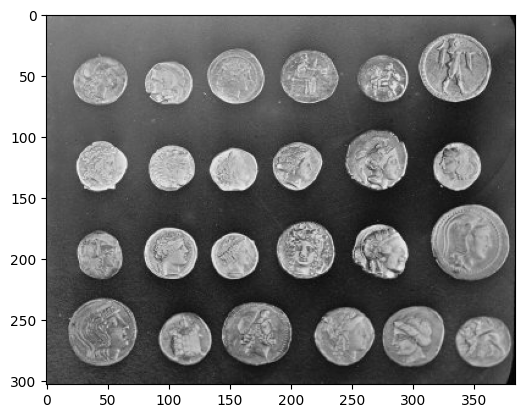

In [5]:
img = imread('S03i3165l01.jpg')
plt.imshow(img)
plt.show()

In [6]:
type(img)

numpy.ndarray

La imagen con la que se trabaja es array de numpy cada elemento corresponde un color en distintos canales

Se puede omitir descargar la imagen por wget ya que esta incluida dentro de la libreria skimage

/tmp/ipykernel_40/896547842.py:6: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  ski.io.imshow(image)
/tmp/ipykernel_40/896547842.py:7: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  ski.io.show()


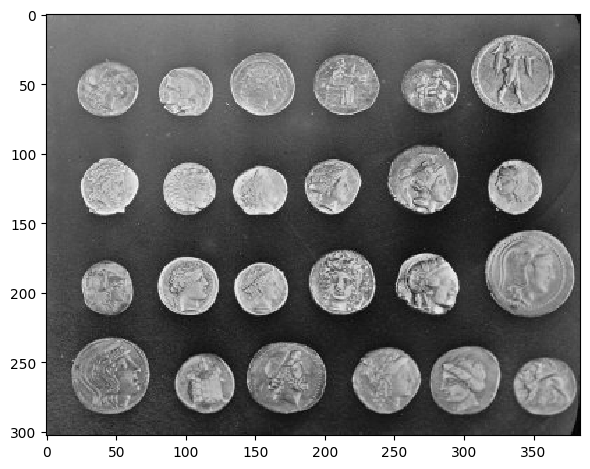

In [7]:
import skimage as ski

image = ski.data.coins()
# ... or any other NumPy array!
edges = ski.filters.sobel(image)
ski.io.imshow(image)
ski.io.show()

# ski.io.imshow(edges)
# ski.io.show()

In [8]:
def data_img(img):
  print('Tamaño = ',img.shape)
  print('Max  = ',np.max(img))
  print('Min  = ',np.min(img))

data_img(img)

Tamaño =  (303, 384, 3)
Max  =  252
Min  =  1


La imagen tiene 303 elementos en el eje y(vertical) y 384 en el eje x, el último elemento pertenece a los canales RGB o BGR eso se verá más adelante. Los valores de max y min son correspondientes a la intensidad del color, cuanto más cercano a cero el color es oscuro. La imagen se encuentra en escala de grises

## Recorte

El recorte es aproximado, se puede ir moviendo para buscar otra moneda.

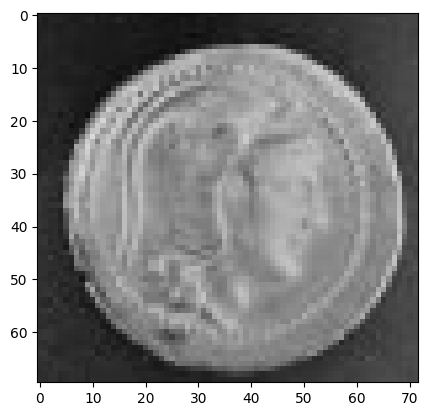

In [9]:
# Primero alto, despues ancho
img_cropped = img[150:220, 310:382] # Desde : hasta de la imagen original
plt.imshow(img_cropped)

In [10]:
data_img(img_cropped)

Tamaño =  (70, 72, 3)
Max  =  218
Min  =  12


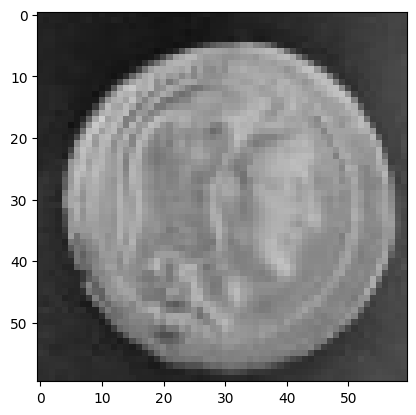

In [11]:
# Primero ancho y despues alto
img_resize = cv2.resize(img_cropped, (60, 60))
plt.imshow(img_resize)

## Apilamiento "vstak  y hstack"

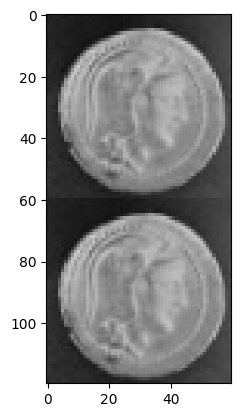

In [12]:
# Apilado vertical
ver = np.vstack((img_resize, img_resize))
plt.imshow(ver)

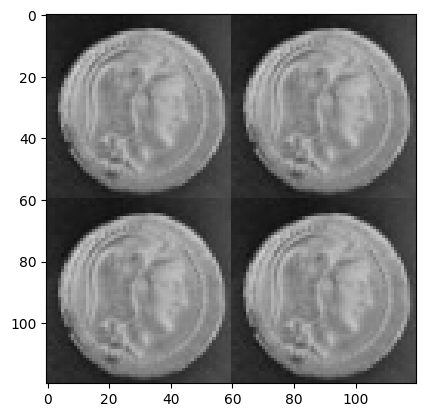

In [13]:
# Apilamos horizontamente dos filas, generando una "matriz" de 2x2
hor2 = np.hstack((ver, ver))
plt.imshow(hor2);

## Selección de un canal

Seleccionamos un canal de la imagen, en este caso es el cero

img canal 0
Tamaño =  (70, 72)
Max  =  218
Min  =  12
img canal 1
Tamaño =  (70, 72)
Max  =  218
Min  =  12
img canal 2
Tamaño =  (70, 72)
Max  =  218
Min  =  12


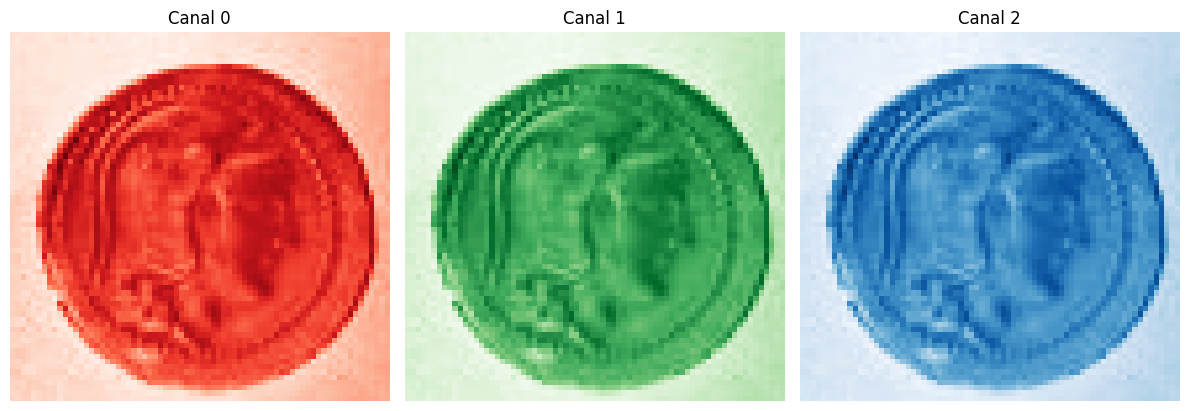

In [36]:
img_canal_0 = img_cropped[:,:,0]
img_canal_1 = img_cropped[:,:,1]
img_canal_2 = img_cropped[:,:,2]

print("img canal 0")
data_img(img_canal_0)
print("img canal 1")
data_img(img_canal_1)
print("img canal 2")
data_img(img_canal_2)

# Configuramos la figura para mostrar tres subgráficos en una fila
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_canal_0, cmap='Reds')
plt.title('Canal 0')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_canal_1, cmap='Greens')
plt.title('Canal 1')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_canal_2, cmap='Blues')
plt.title('Canal 2')
plt.axis('off')

plt.tight_layout()
plt.show()



El hecho de que se vean las imágenes en los distintos colores no implica que cada canal tenga información sobre cada color. La particularidad de las imágenes en escala de grises es que tanto canal_0, canal_1 y canal_3 son bidimensionales. Lo que se ve es el canal de escala de grises usando la intensidad de los distintos canales(Red, Green, Blue)

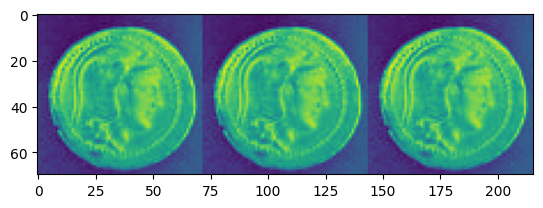

In [16]:
canales = np.hstack((img_canal_0, img_canal_1, img_canal_2))
plt.imshow(canales)

### ¿Por qué la moneda se ve en colores violetas y verdes?

Cuando proporcionas un arreglo 2D a plt.imshow() sin un argumento cmap, se utiliza por defecto un mapa de colores llamado 'viridis' (o un mapa de colores perceptualmente uniforme similar en versiones más recientes de Matplotlib). Este mapa de colores asigna los valores numéricos en tu arreglo 2D (las intensidades en escala de grises) a un espectro de colores. 

Este mapa de colores transiciona suavemente a través de un rango de colores, que a menudo incluye tonos de azul, verde, amarillo y, a veces, matices púrpuras dependiendo del rango exacto de tus valores en escala de grises.

# Clase 26-03

Laboratorio

Trabajamos con un set de imágenes del repositorio

https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/dataset/images.html

In [17]:
!wget https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/86000.jpg

--2025-04-08 22:55:16--  https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/86000.jpg
Resolving www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)... 128.32.244.190
Connecting to www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)|128.32.244.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32265 (32K) [image/jpeg]
Saving to: ‘86000.jpg.1’

86000.jpg.1         100%[===================>]  31.51K  --.-KB/s    in 0.06s   

2025-04-08 22:55:17 (527 KB/s) - ‘86000.jpg.1’ saved [32265/32265]



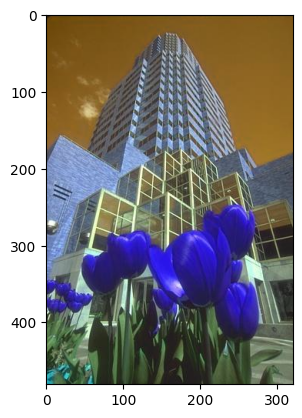

Shape (481, 321, 3)


In [18]:
img2 = cv2.imread('86000.jpg')
plt.imshow(img2)
plt.show()
print("Shape", img2.shape)

In [19]:
pixel = img[0,321]


In [20]:
def extract_pixel(image: np.ndarray, x: int, y: int):
    if x >= 0 and x < image.shape[0] and y >= 0 and y < image.shape[1]:
        return image[y, x, :]
    else: # indices fuera de limites de la imagen
        return None

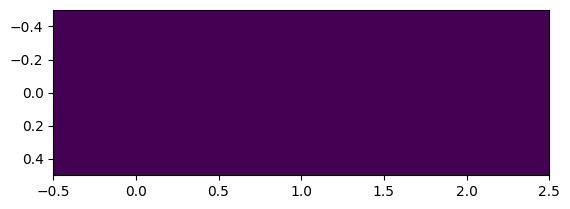

In [21]:
plt.imshow([pixel])

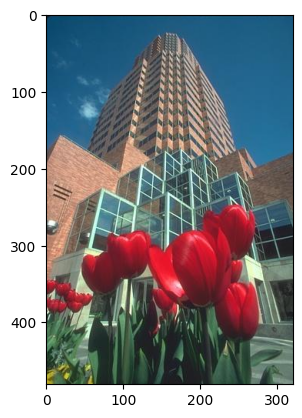

Shape (481, 321, 3)


In [22]:
img_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()
print("Shape", img_rgb.shape)

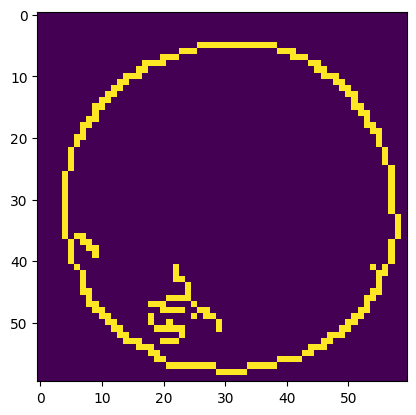

In [23]:
img_canny = cv2.Canny(img_resize, 150, 300)
plt.imshow(img_canny)

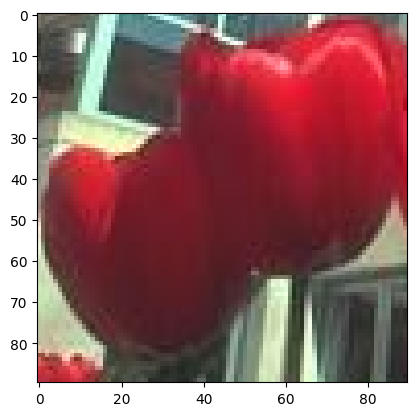

In [24]:
nueva_imagen =img_rgb[280:370,45:135]
plt.imshow(nueva_imagen)

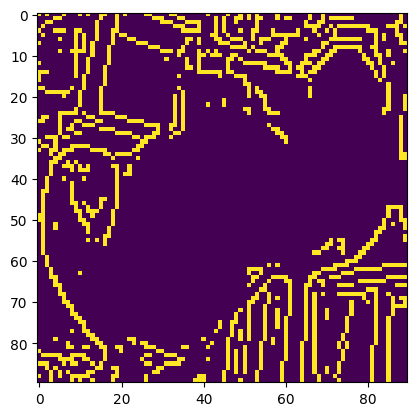

In [25]:
nueva_canny = cv2.Canny(nueva_imagen, 100, 100)
plt.imshow(nueva_canny)

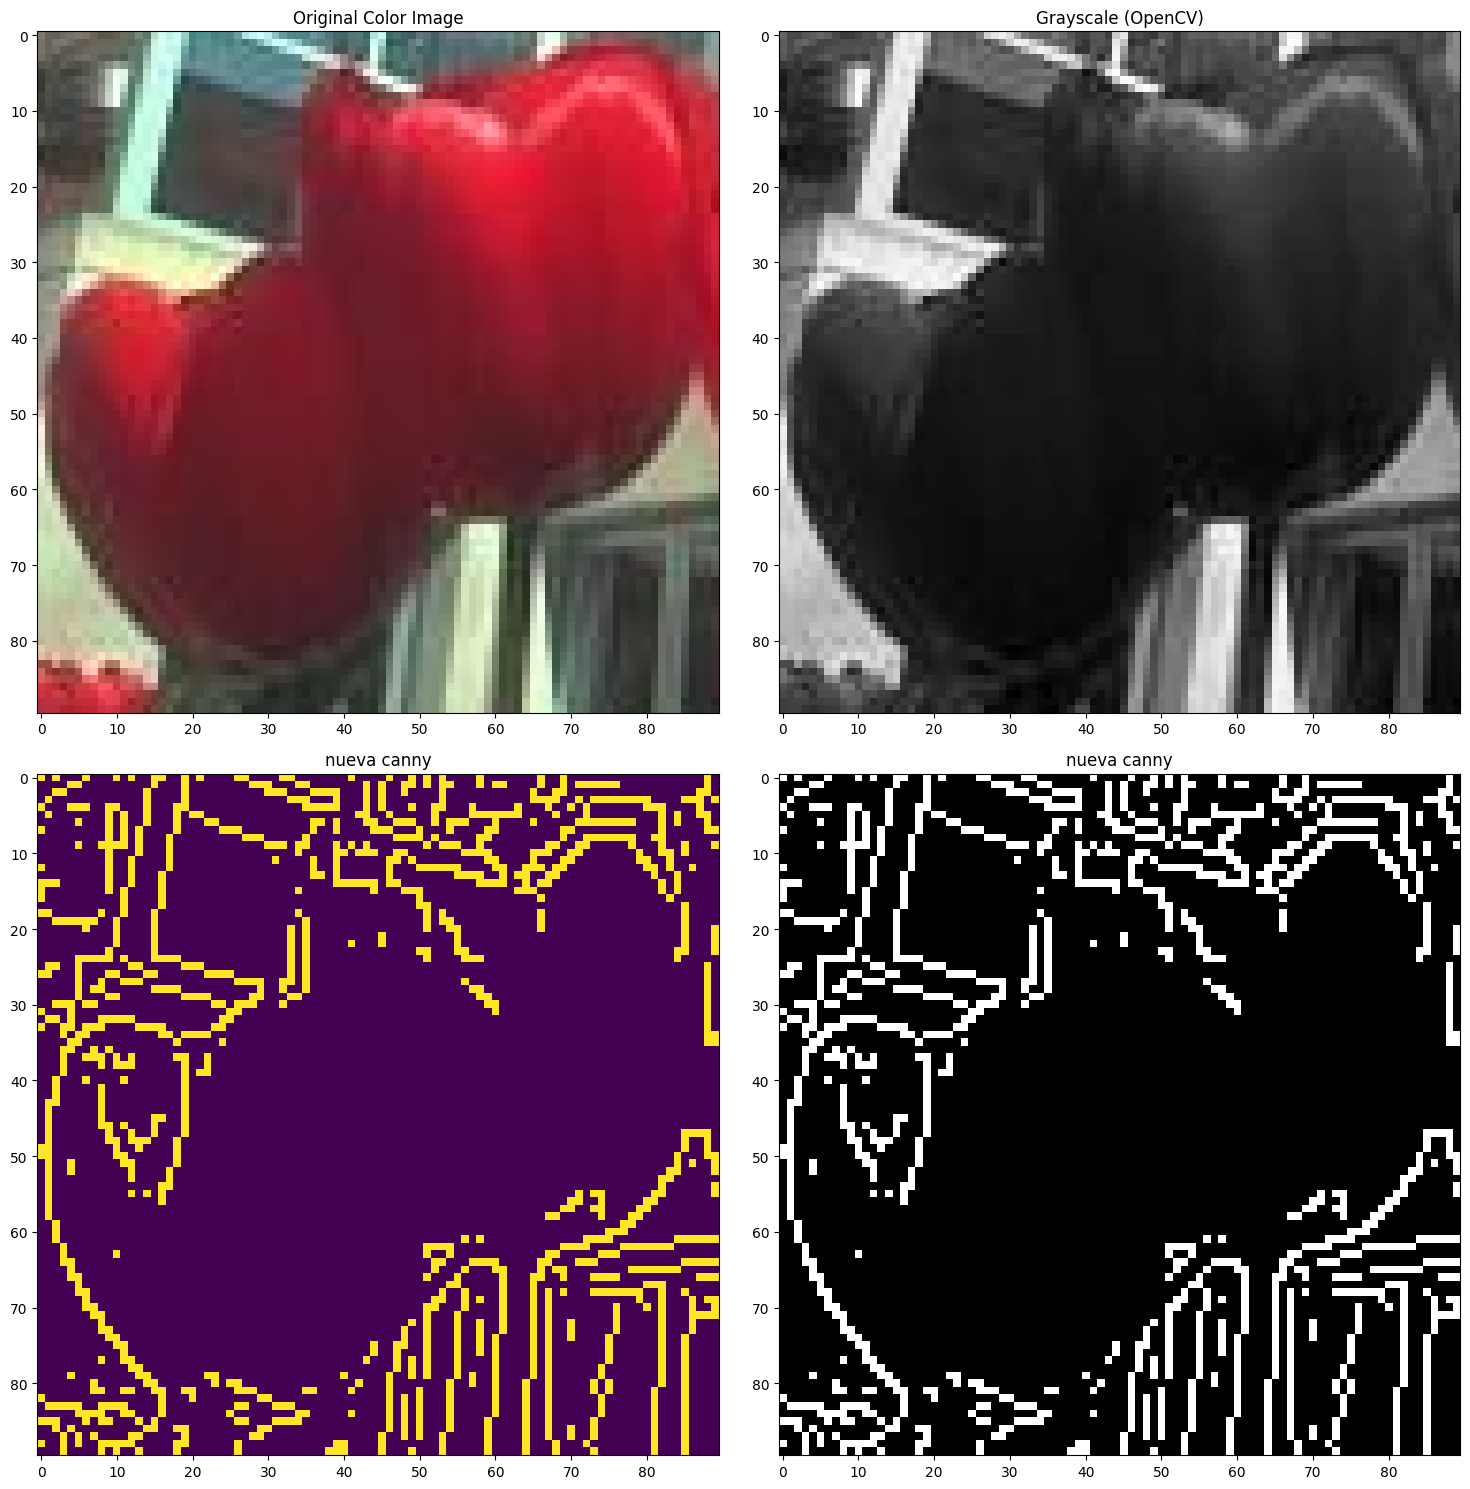

In [26]:
imagen_gris_cv2 = cv2.cvtColor(nueva_imagen, cv2.COLOR_RGB2GRAY)
imagen_gris_numpy = np.mean(nueva_imagen, axis=2).astype(np.uint8)
# Visualization
plt.figure(figsize=(15, 15))

# Original color image
plt.subplot(2, 2, 1)
plt.imshow(nueva_imagen)
plt.title('Original Color Image')

# Grayscale using OpenCV
plt.subplot(2, 2, 2)
plt.imshow(imagen_gris_cv2, cmap='gray')
plt.title('Grayscale (OpenCV)')

# Grayscale using NumPy
plt.subplot(2, 2, 3)
plt.imshow(nueva_canny)
plt.title('nueva canny')

# Grayscale using NumPy
plt.subplot(2, 2, 4)
plt.imshow(nueva_canny, cmap='gray')
plt.title('nueva canny')
plt.tight_layout()
plt.show()


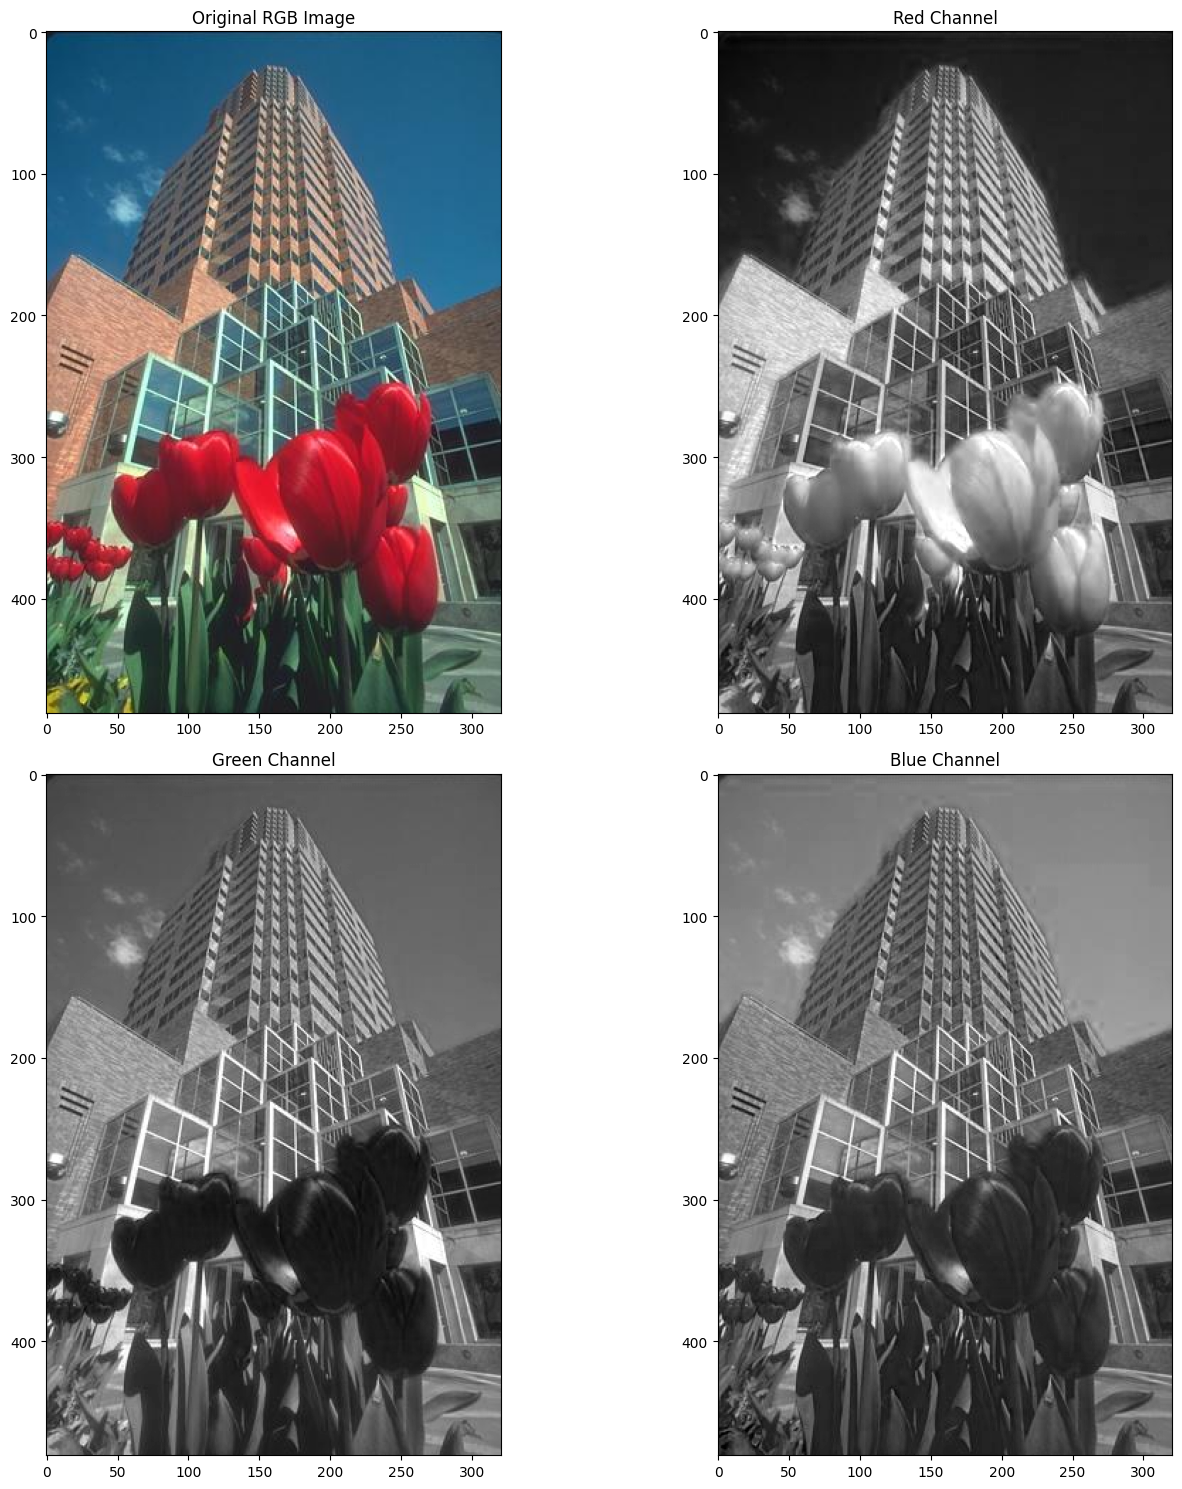

In [27]:
# Create a 2x2 subplot
plt.figure(figsize=(15, 15))

# Original RGB Image
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('Original RGB Image')

# Red Channel
red_channel = img_rgb[:,:,0]
plt.subplot(2, 2, 2)
plt.imshow(red_channel, cmap='gray')
plt.title('Red Channel')

# Green Channel
green_channel = img_rgb[:,:,1]
plt.subplot(2, 2, 3)
plt.imshow(green_channel, cmap='gray')
plt.title('Green Channel')

# Blue Channel
blue_channel = img_rgb[:,:,2]
plt.subplot(2, 2, 4)
plt.imshow(blue_channel, cmap='gray')
plt.title('Blue Channel')

plt.tight_layout()
plt.show()

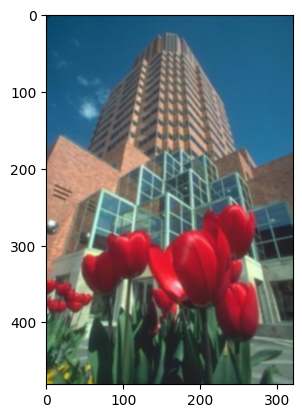

In [28]:
img_blur = cv2.GaussianBlur(img_rgb, (5, 5), 0)
plt.imshow(img_blur)
plt.show()

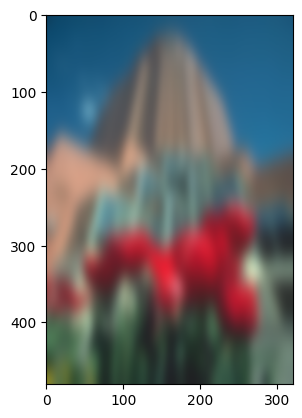

In [29]:
img_blur = cv2.GaussianBlur(img_rgb, (33, 77), 0)
plt.imshow(img_blur)
plt.show()

In [30]:
img_gray 

NameError: name 'img_gray' is not defined

In [ ]:
pixel1 = (0, 0, 0)
pixel2 = (255,0, 255)
pixel3 = (0, 0, 0)
plt.imshow([[pixel1, pixel2, pixel3]]);

#######3

edges = ski.filters.sobel(image)
ski.io.imshow(edges)
ski.io.show()